In [28]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
#Reading the User Profile Data
df = pd.read_csv("user_profiles.csv")

In [3]:
#Checking the size of the dataframe
df.shape

(45395, 30)

In [4]:
#Checking for nulls
df.isnull().sum()

user_id                  0
account_creation_date    0
bundle                   0
activeDays               0
activeDaysWeb            0
activeDaysApps           0
activeDaysiOs            0
activeDaysiPhone         0
activeDaysiPad           0
activeDaysAndroid        0
visitsiPhone             0
visitsiPad               0
visitsAndroid            0
visitsWeb                0
visitsApps               0
articleViewsWeb          0
articleViewsApps         0
articlesPerVisitWeb      0
articlesPerVisitApps     0
viewsOpinion             0
viewsPolitics            0
viewsBusiness            0
viewsMarkets             0
viewsWorld               0
viewsLife                0
viewsTech                0
viewsUS                  0
viewsEconomy             0
playsPuzzle              0
newsletterActivation     0
dtype: int64

In [5]:
#Checking for duplicates
df.duplicated().sum()

0

### This dataset seems to be a perfect dataset with no nulls or duplicated data. But is it really though?


In [6]:
#Getting some info on the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45395 entries, 0 to 45394
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                45395 non-null  object 
 1   account_creation_date  45395 non-null  object 
 2   bundle                 45395 non-null  object 
 3   activeDays             45395 non-null  int64  
 4   activeDaysWeb          45395 non-null  int64  
 5   activeDaysApps         45395 non-null  int64  
 6   activeDaysiOs          45395 non-null  int64  
 7   activeDaysiPhone       45395 non-null  int64  
 8   activeDaysiPad         45395 non-null  int64  
 9   activeDaysAndroid      45395 non-null  int64  
 10  visitsiPhone           45395 non-null  int64  
 11  visitsiPad             45395 non-null  int64  
 12  visitsAndroid          45395 non-null  int64  
 13  visitsWeb              45395 non-null  int64  
 14  visitsApps             45395 non-null  int64  
 15  ar

In [7]:
#Looking into the statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
activeDays,45395.0,10.975967,8.984219,1.0,3.000000,8.000000,19.00000,28.000000
activeDaysWeb,45395.0,6.328759,7.517812,0.0,1.000000,3.000000,9.00000,28.000000
activeDaysApps,45395.0,6.513757,8.361907,0.0,0.000000,2.000000,11.00000,28.000000
activeDaysiOs,45395.0,5.839520,8.217781,0.0,0.000000,1.000000,9.00000,28.000000
activeDaysiPhone,45395.0,4.822513,7.537603,0.0,0.000000,1.000000,7.00000,28.000000
activeDaysiPad,45395.0,1.304373,4.444281,0.0,0.000000,0.000000,0.00000,28.000000
activeDaysAndroid,45395.0,0.720938,3.186023,0.0,0.000000,0.000000,0.00000,28.000000
visitsiPhone,45395.0,14.351448,41.030956,0.0,0.000000,1.000000,11.00000,1224.000000
visitsiPad,45395.0,3.397621,16.156040,0.0,0.000000,0.000000,0.00000,420.000000
visitsAndroid,45395.0,1.839035,12.790658,0.0,0.000000,0.000000,0.00000,692.000000


## Few observations from the above statistics:
1. The mean for playsPuzzle and newsletterActivation columns is close to zero, though each of them have 49,395 non-null values in them. This suggests that maybe just a very minor or almost inconsiderable part of the users take part in playing puzzles or opt to newsletter.
2. The standard deviation for majority of the features is much higher compared to their mean, indicating that the values are dispersed.
3. Every column of Visits, Article Views, and Views categories have such wide ranges between their Min and Max indicating a large degree of variability in user behavior.

In [8]:
#Correlation of the dataframe to see the relationship of features on one-another
df.corr()

,activeDays,activeDaysWeb,activeDaysApps,activeDaysiOs,activeDaysiPhone,activeDaysiPad,activeDaysAndroid,visitsiPhone,visitsiPad,visitsAndroid,...,viewsPolitics,viewsBusiness,viewsMarkets,viewsWorld,viewsLife,viewsTech,viewsUS,viewsEconomy,playsPuzzle,newsletterActivation
activeDays,1.000000,0.698776,0.708879,0.655146,0.584001,0.314748,0.193250,0.426955,0.255053,0.154785,...,0.386737,0.347242,0.409823,0.348237,0.445824,0.374343,0.313538,0.334844,0.069003,-0.021237
activeDaysWeb,0.698776,1.000000,0.064497,0.045838,0.049835,0.028565,0.063424,0.086504,0.037352,0.058679,...,0.213685,0.193025,0.266947,0.194558,0.314858,0.200901,0.175915,0.239763,0.048589,-0.000998
activeDaysApps,0.708879,0.064497,1.000000,0.932991,0.828694,0.447345,0.247190,0.586133,0.356135,0.196694,...,0.390780,0.354107,0.390934,0.343853,0.389335,0.391616,0.313473,0.296333,0.051969,-0.019744
activeDaysiOs,0.655146,0.045838,0.932991,1.000000,0.889978,0.474564,-0.109185,0.622772,0.376626,-0.065026,...,0.408851,0.364928,0.405104,0.352775,0.405248,0.413816,0.315915,0.310317,0.054083,-0.020052
activeDaysiPhone,0.584001,0.049835,0.828694,0.889978,1.000000,0.053512,-0.102453,0.701305,0.046854,-0.062357,...,0.319345,0.253890,0.337740,0.260060,0.314784,0.339161,0.184482,0.254890,-0.003695,-0.016088
activeDaysiPad,0.314748,0.028565,0.447345,0.474564,0.053512,1.000000,-0.036116,0.046588,0.799837,-0.015945,...,0.326498,0.341582,0.277997,0.308114,0.333273,0.301471,0.366163,0.218204,0.121421,-0.008512
activeDaysAndroid,0.193250,0.063424,0.247190,-0.109185,-0.102453,-0.036116,1.000000,-0.049062,-0.024921,0.744138,...,-0.013469,0.001363,-0.000621,0.008452,-0.003680,-0.024062,0.021854,-0.008833,-0.002102,-0.000995
visitsiPhone,0.426955,0.086504,0.586133,0.622772,0.701305,0.046588,-0.049062,1.000000,0.077803,-0.022045,...,0.488881,0.386240,0.499691,0.420885,0.479239,0.506445,0.303626,0.409214,0.010053,-0.005769
visitsiPad,0.255053,0.037352,0.356135,0.376626,0.046854,0.799837,-0.024921,0.077803,1.000000,-0.001771,...,0.428545,0.433514,0.353015,0.407093,0.435557,0.373141,0.465055,0.273726,0.184243,-0.005816
visitsAndroid,0.154785,0.058679,0.196694,-0.065026,-0.062357,-0.015945,0.744138,-0.022045,-0.001771,1.000000,...,0.013718,0.034479,0.033867,0.047206,0.031614,0.003930,0.056071,0.014815,0.002933,0.005940


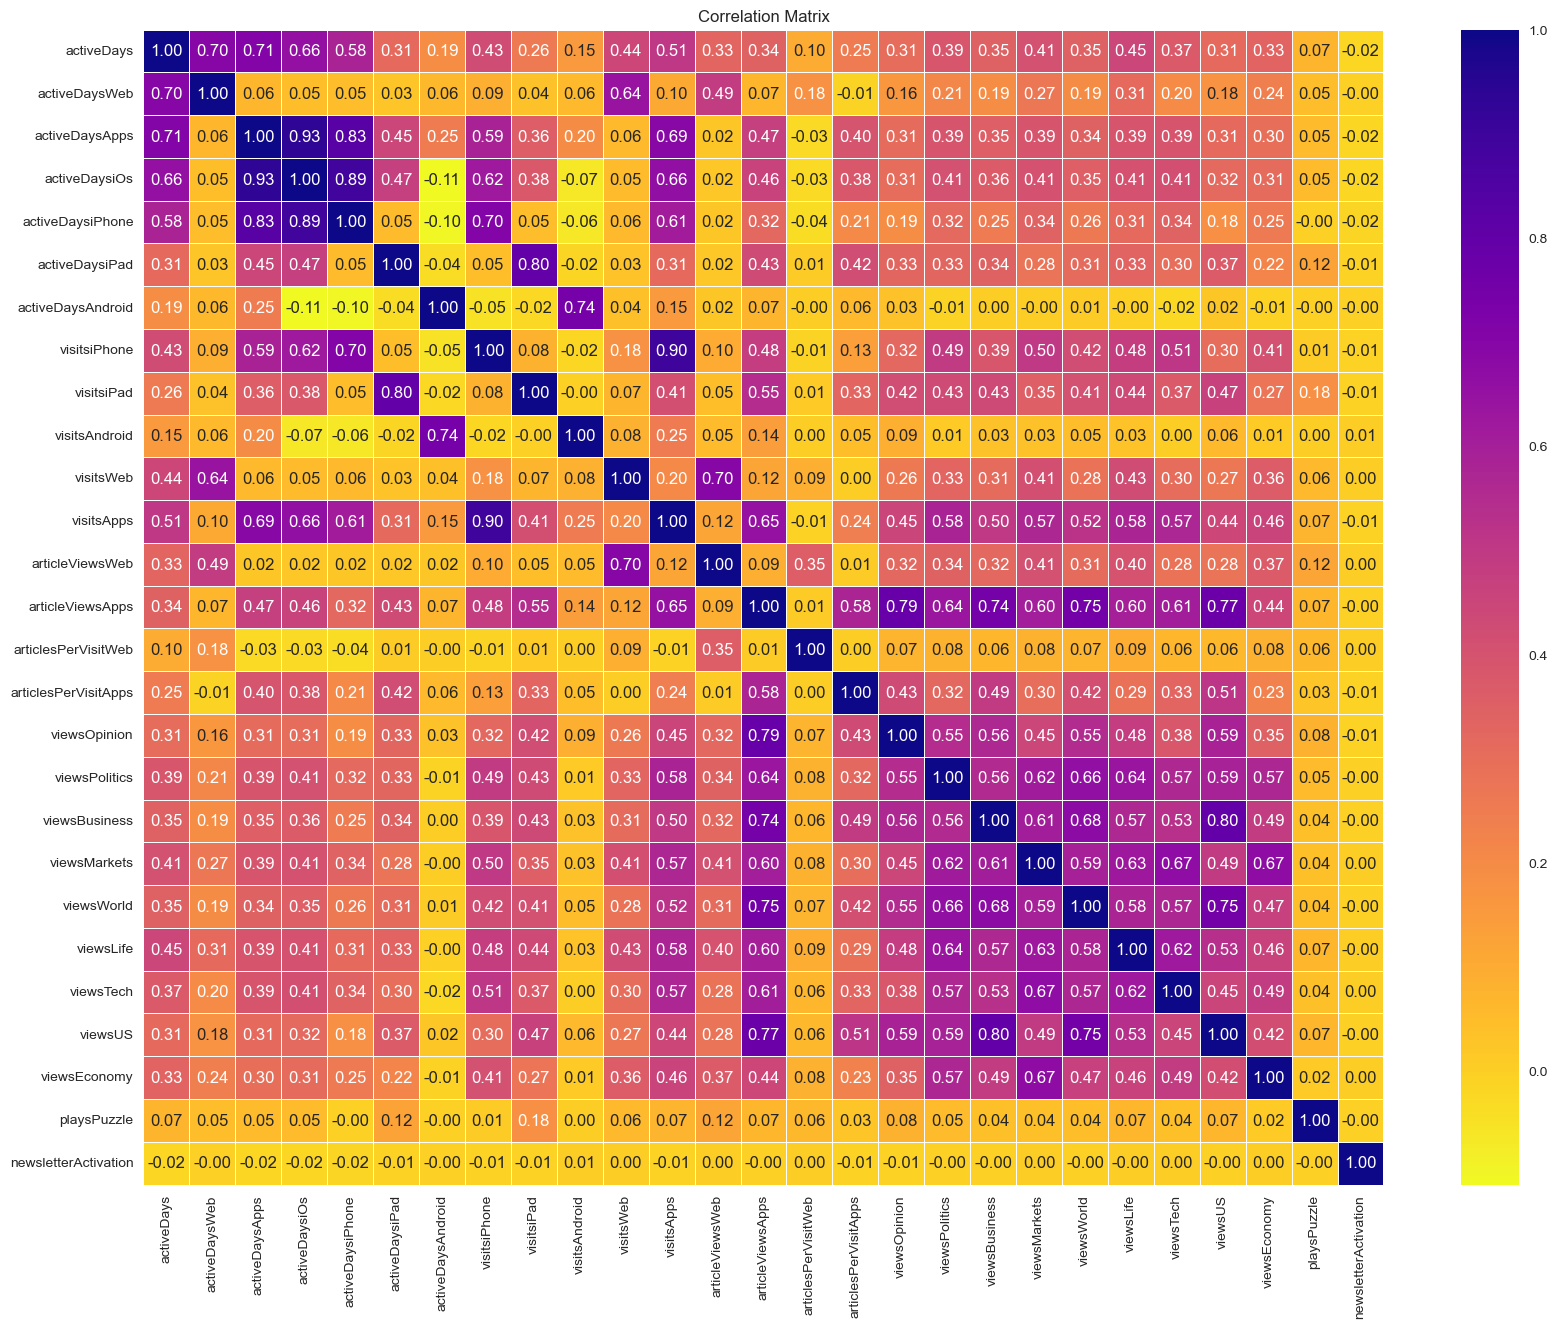

In [9]:
#Visualizing the correlation for quicker understanding of the relationship
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Draw the heatmap using seaborn
sns.heatmap(correlation_matrix, cmap="plasma_r", annot=True, fmt=".2f", linewidths=.5)

# Show the plot
plt.title('Correlation Matrix')
plt.show()

## Few Observations from the correlation matrix:
1. playsPuzzle and newsletterActivation literally has almost 0 correlation with every other feature. Their presence or absence will not effect any other feature.
2. ActiveDays categories have a stronger correlation among themselves as they're all sub-categories (Active days are classified as being active via Web or App. App is again classified into iOS or Android. iOS further classified into iPhone or iPad). So it is understandable for these columns to have both a positive/negative correlation among themselves based on the user behavior.
3. There's a strong correlation among all the Views categories indicating that users have a pattern in viewing different articles. An Increase in Views for Economy will also lead to an increase in Views for Markets.

In [10]:
#Dropping the playszPuzzle & newsletterActivation columns from the above observations
#Also dropping the user_id column as every user in it is unique. This feature won't help in any analysis.
df.drop('user_id', axis=1, inplace = True)
df.drop('playsPuzzle', axis=1, inplace = True)
df.drop('newsletterActivation', axis=1, inplace = True)

In [11]:
#Viewing the dataframe
df

,account_creation_date,bundle,activeDays,activeDaysWeb,activeDaysApps,activeDaysiOs,activeDaysiPhone,activeDaysiPad,activeDaysAndroid,visitsiPhone,...,articlesPerVisitApps,viewsOpinion,viewsPolitics,viewsBusiness,viewsMarkets,viewsWorld,viewsLife,viewsTech,viewsUS,viewsEconomy
0,2022-01-02,Student Digital Pack,1,0,1,1,1,0,0,1,...,0.000000,0,0,0,0,0,0,0,0,0
1,2020-02-11,Student Digital Pack,2,0,2,2,2,0,0,3,...,1.000000,0,1,0,1,0,0,0,1,0
2,2017-11-22,WSJ-BAR-MW BUNDLE,27,27,5,5,5,0,0,6,...,0.000000,1,2,12,19,3,15,8,5,5
3,2023-01-03,DIGITAL PACKAGE,19,3,18,18,18,0,0,20,...,0.200000,0,0,0,1,0,1,0,0,3
4,2016-02-10,INDIV STUDENT - YOUNG AUDIENCE DIGITAL PACK,23,17,11,11,11,0,0,22,...,0.363636,2,2,14,34,4,4,14,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45390,2023-08-07,DIGITAL PACKAGE,5,5,0,0,0,0,0,0,...,0.000000,0,0,0,0,2,0,0,0,0
45391,2015-04-10,ULTIMATE PACKAGE,6,1,6,6,6,0,0,14,...,6.285714,0,6,0,14,12,0,0,0,0
45392,2023-01-12,DIGITAL PACKAGE,4,4,0,0,0,0,0,0,...,0.000000,2,2,0,0,0,2,4,0,0
45393,2018-05-01,ULTIMATE PACKAGE,19,18,3,3,3,0,0,3,...,0.000000,0,0,0,0,0,2,0,0,0


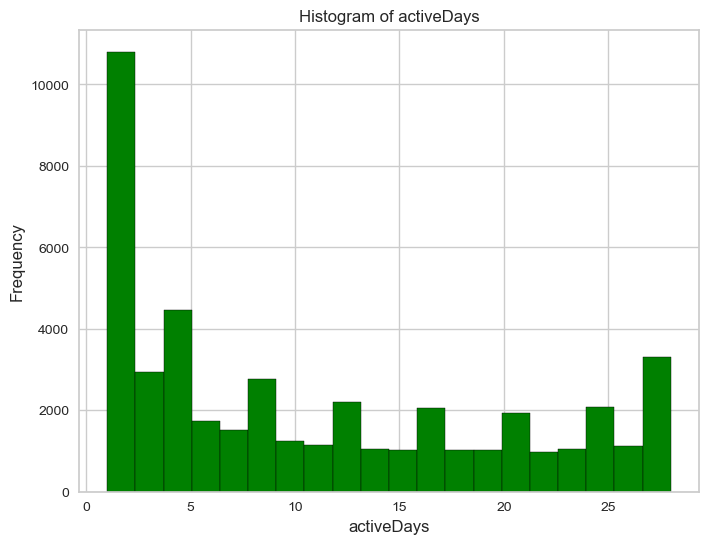

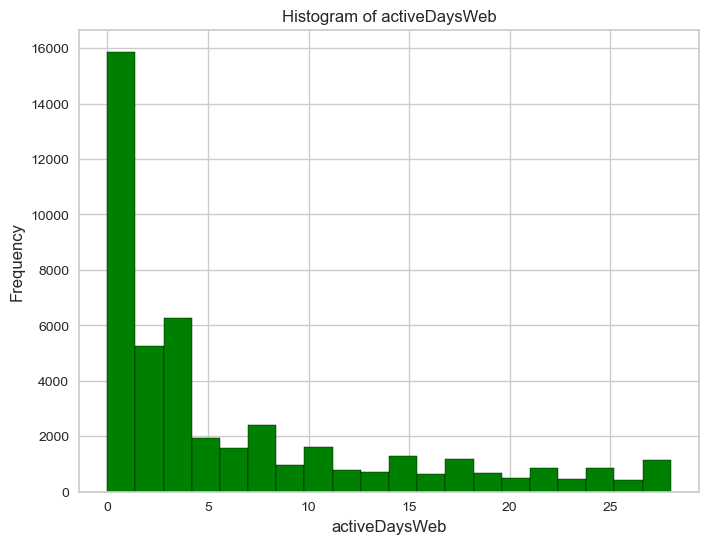

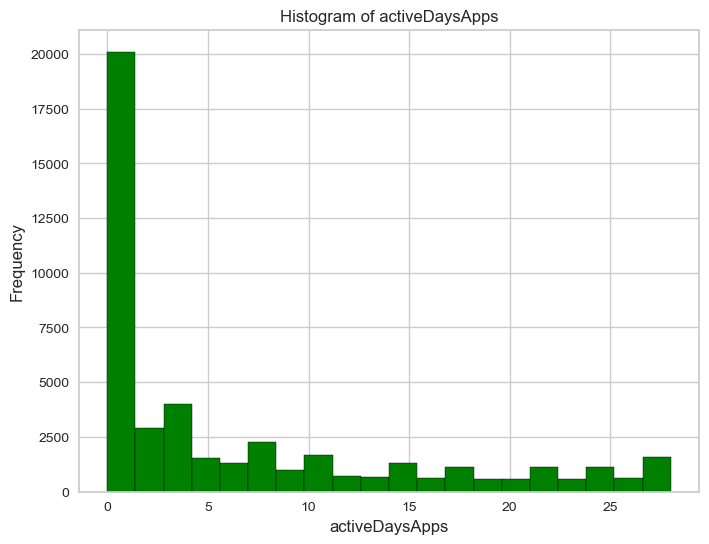

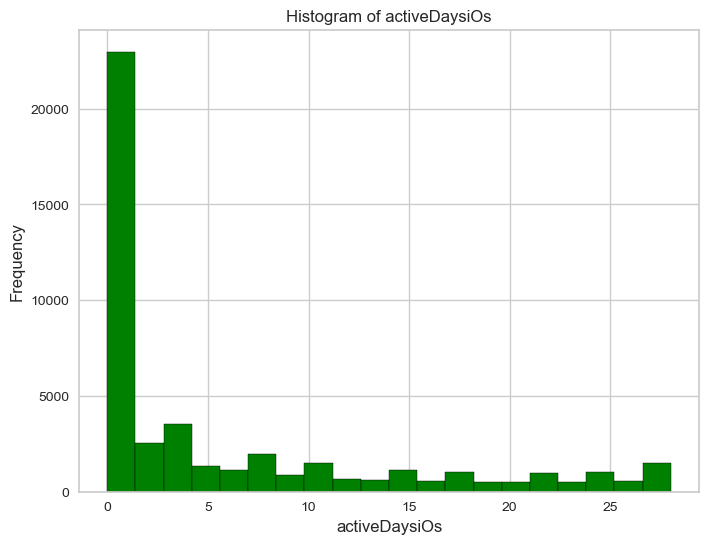

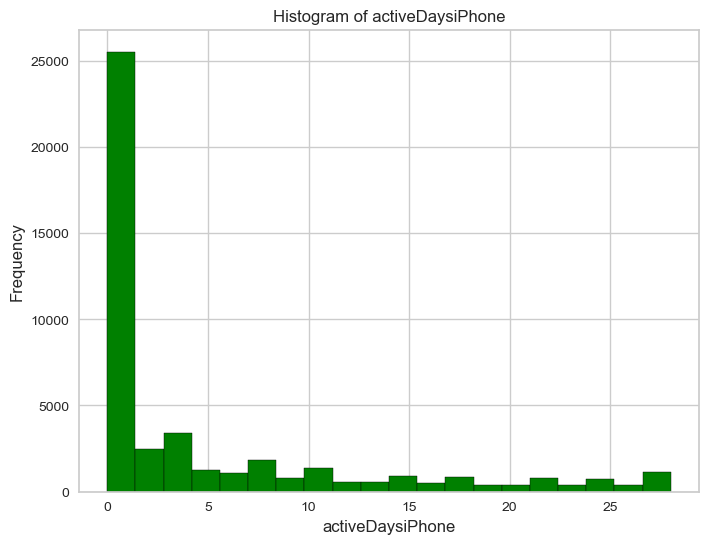

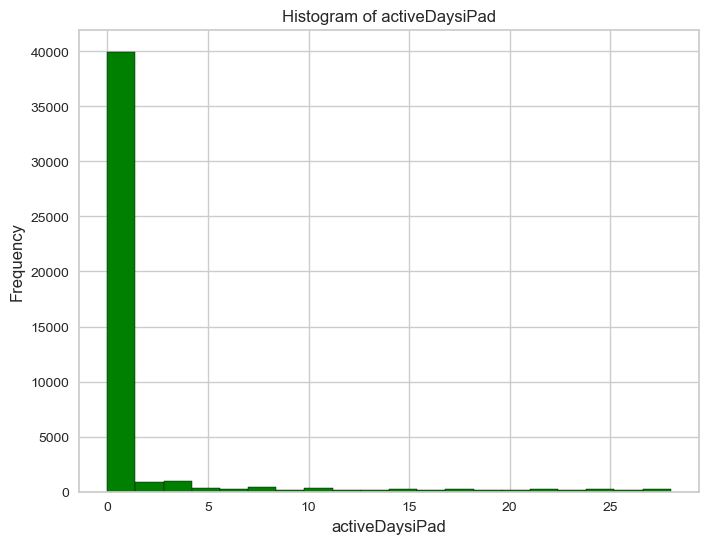

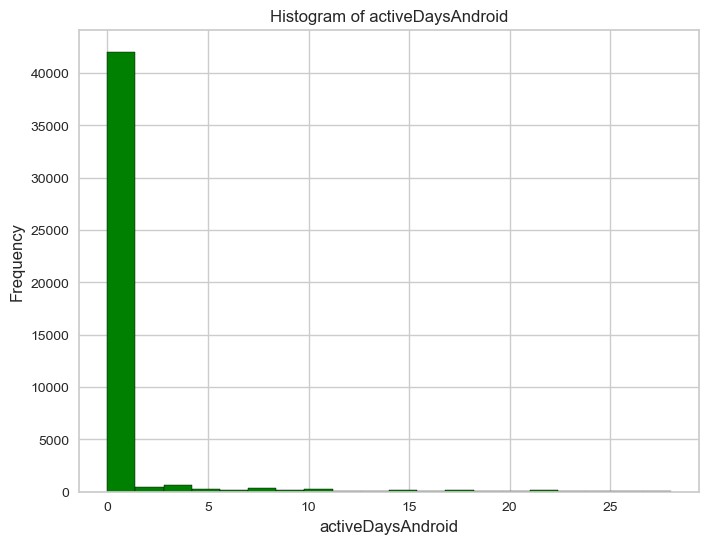

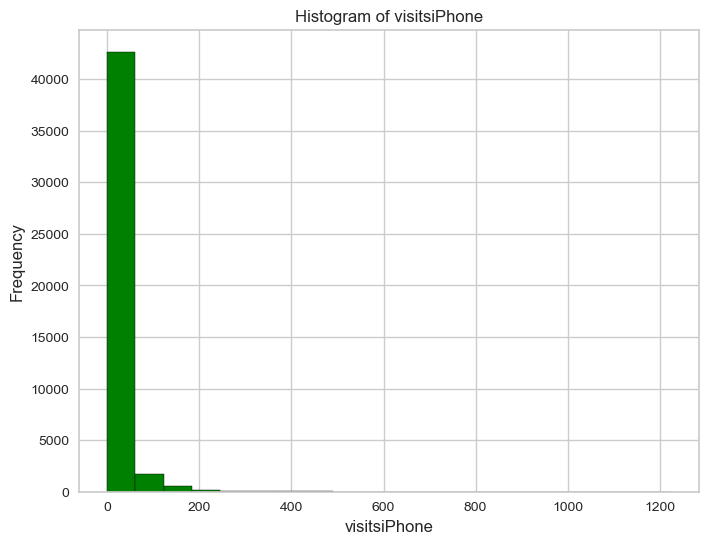

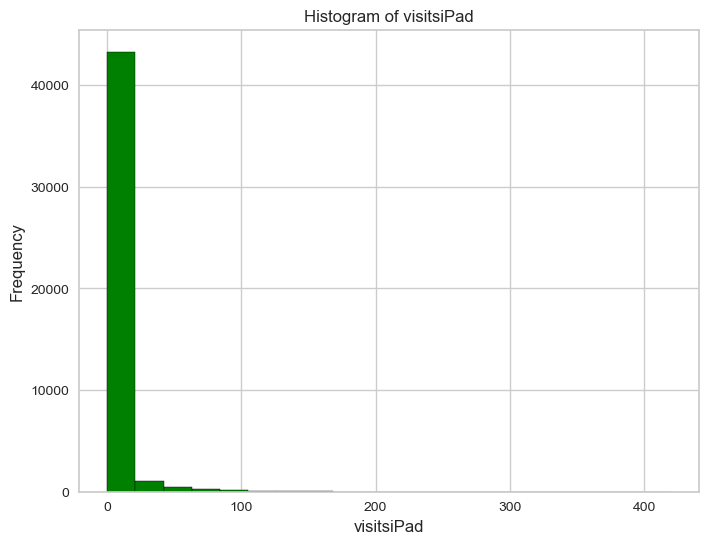

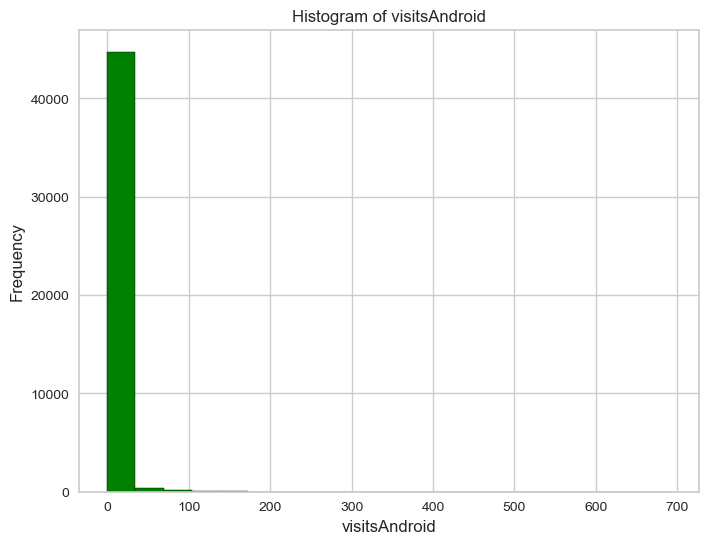

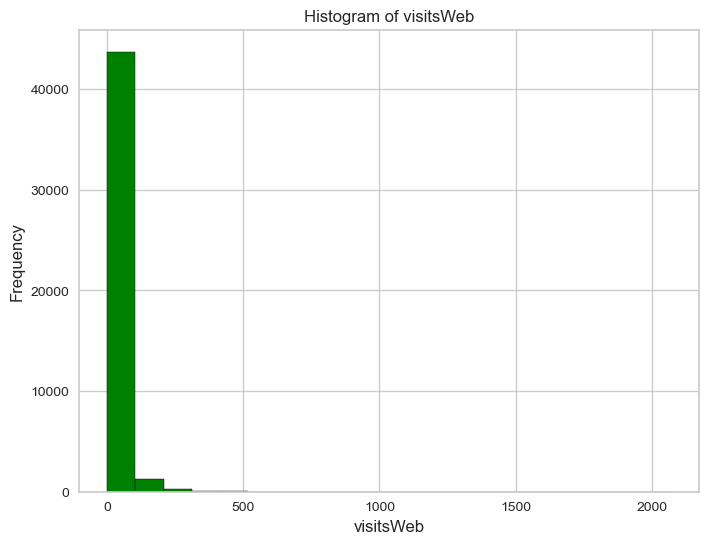

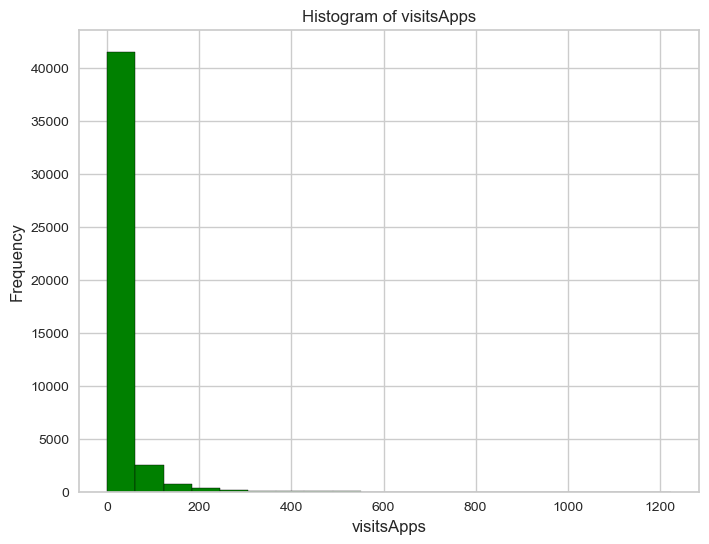

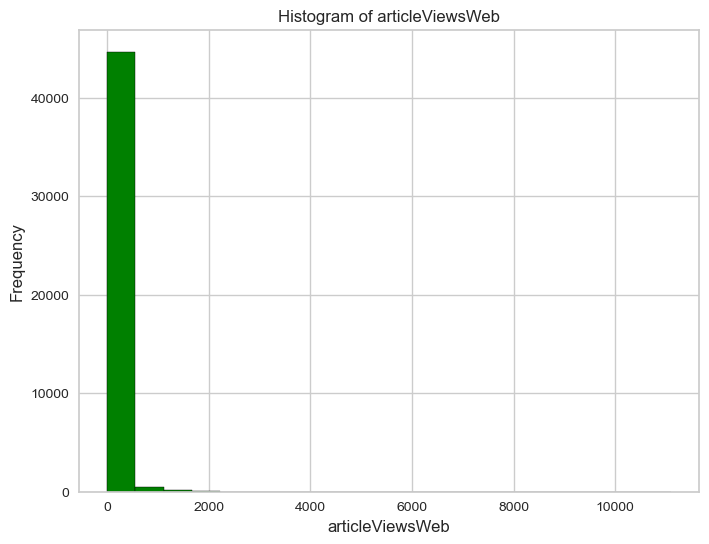

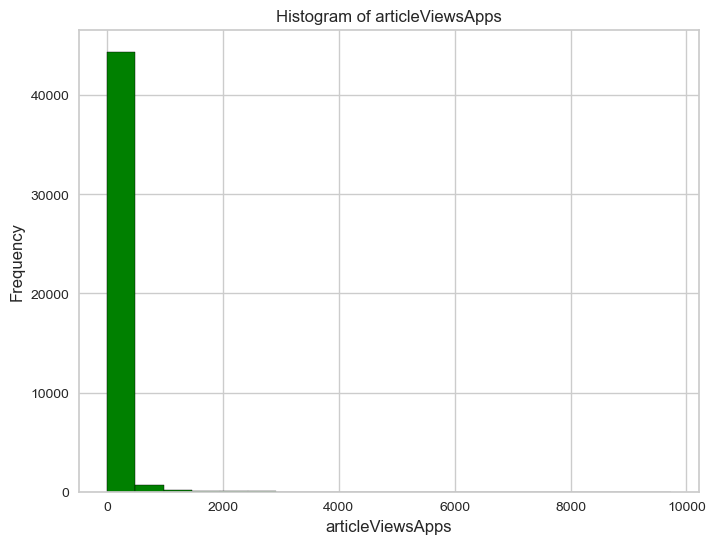

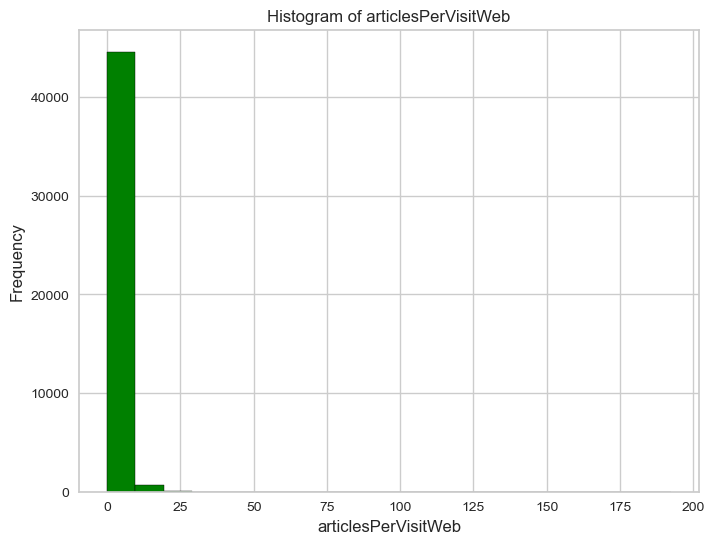

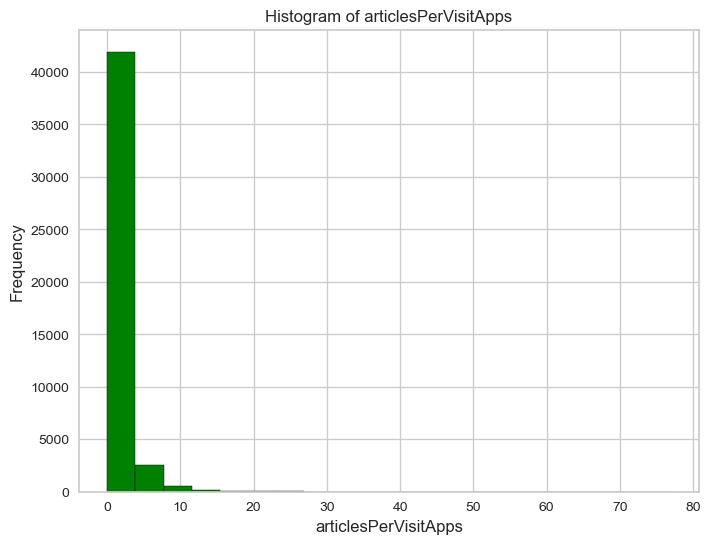

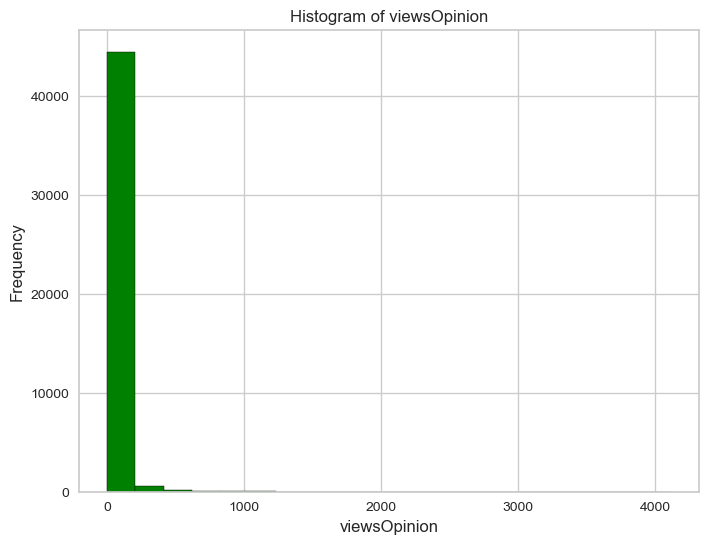

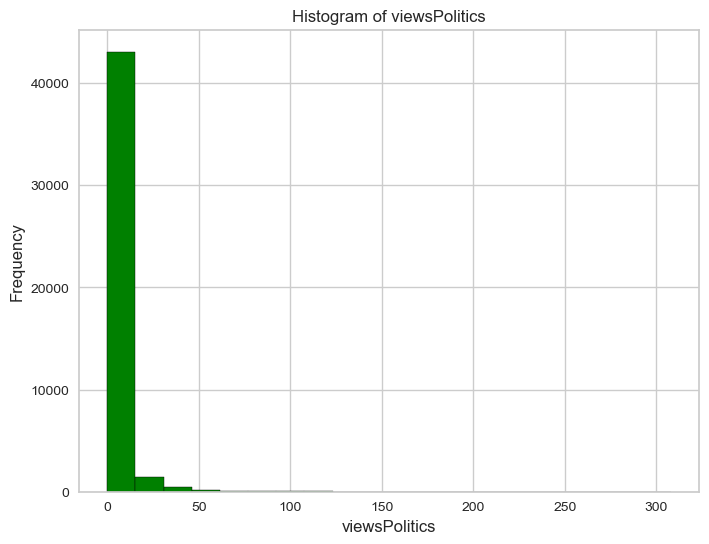

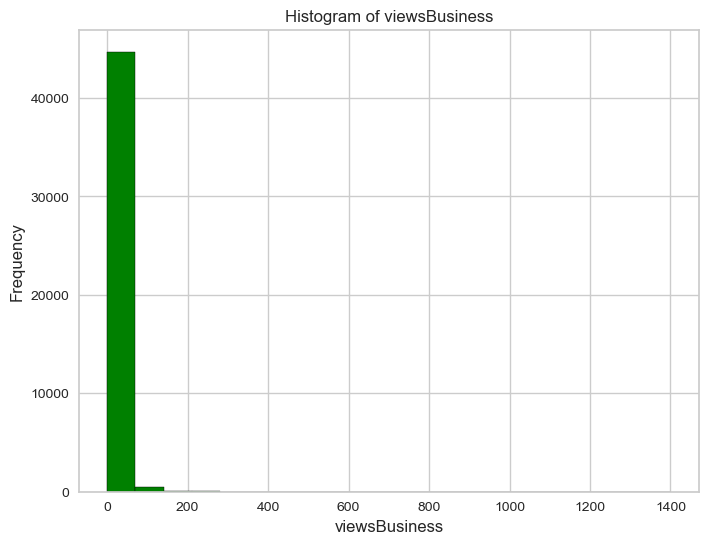

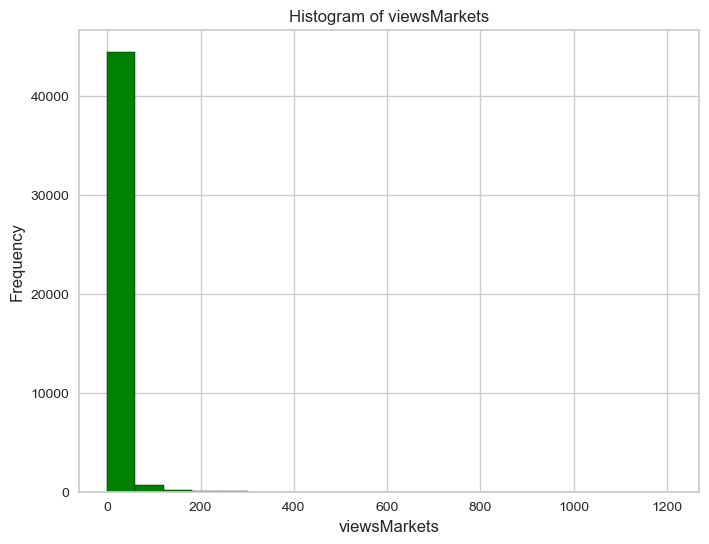

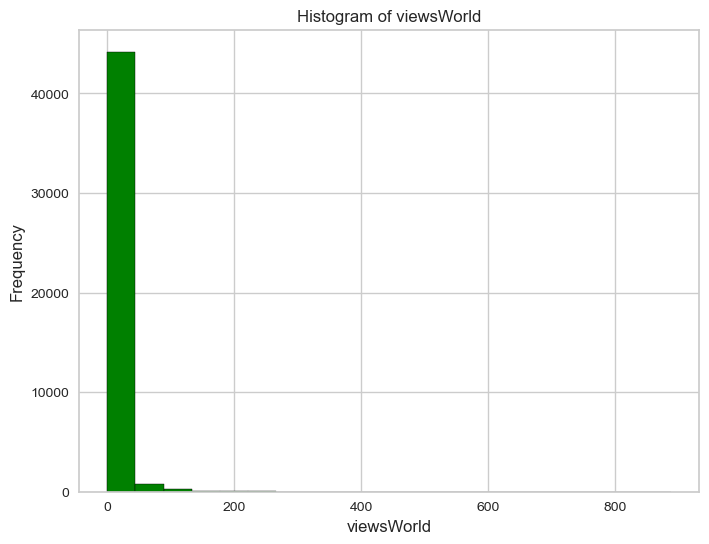

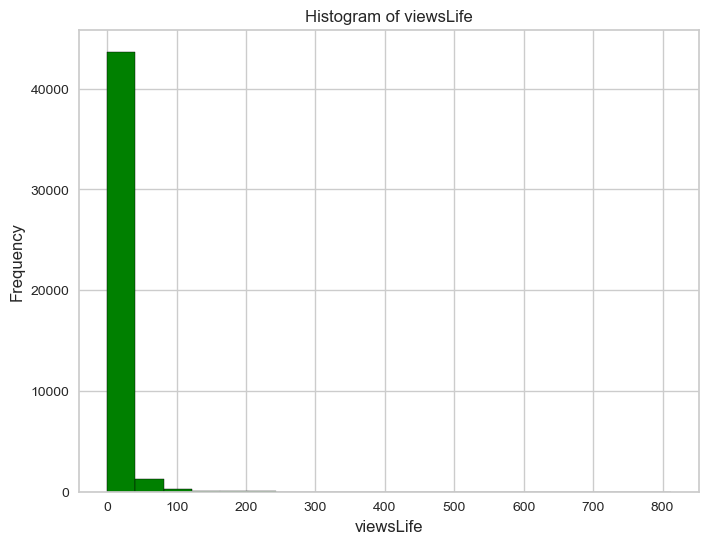

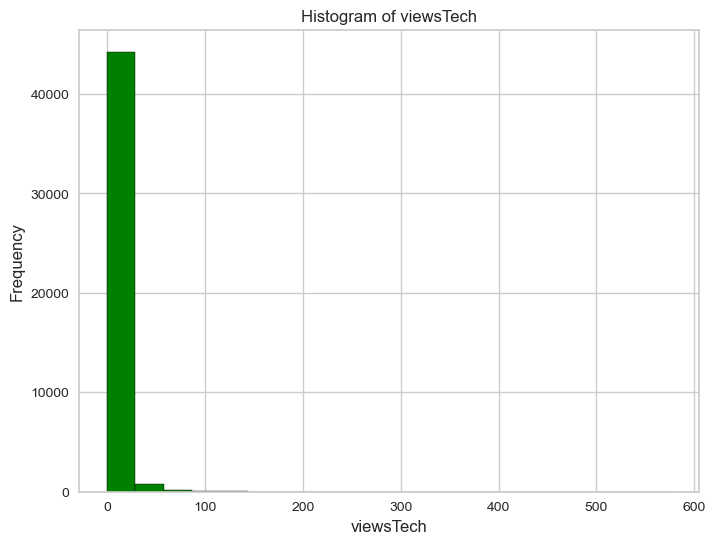

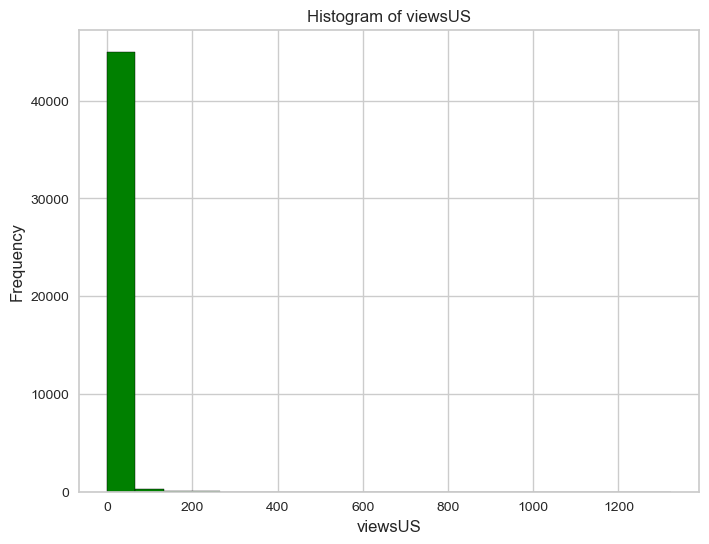

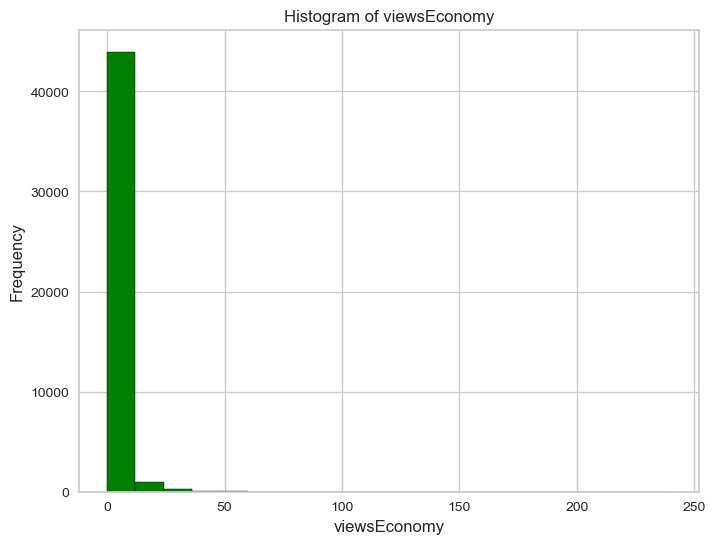

In [12]:
#Exploratory data analysis for all numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Plot histograms for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, color='green', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### Literally every single numerical feature has values highly concentrated on their respective lower end and a long tail of values on their respective higher end. The entire data is heavily right skewed.

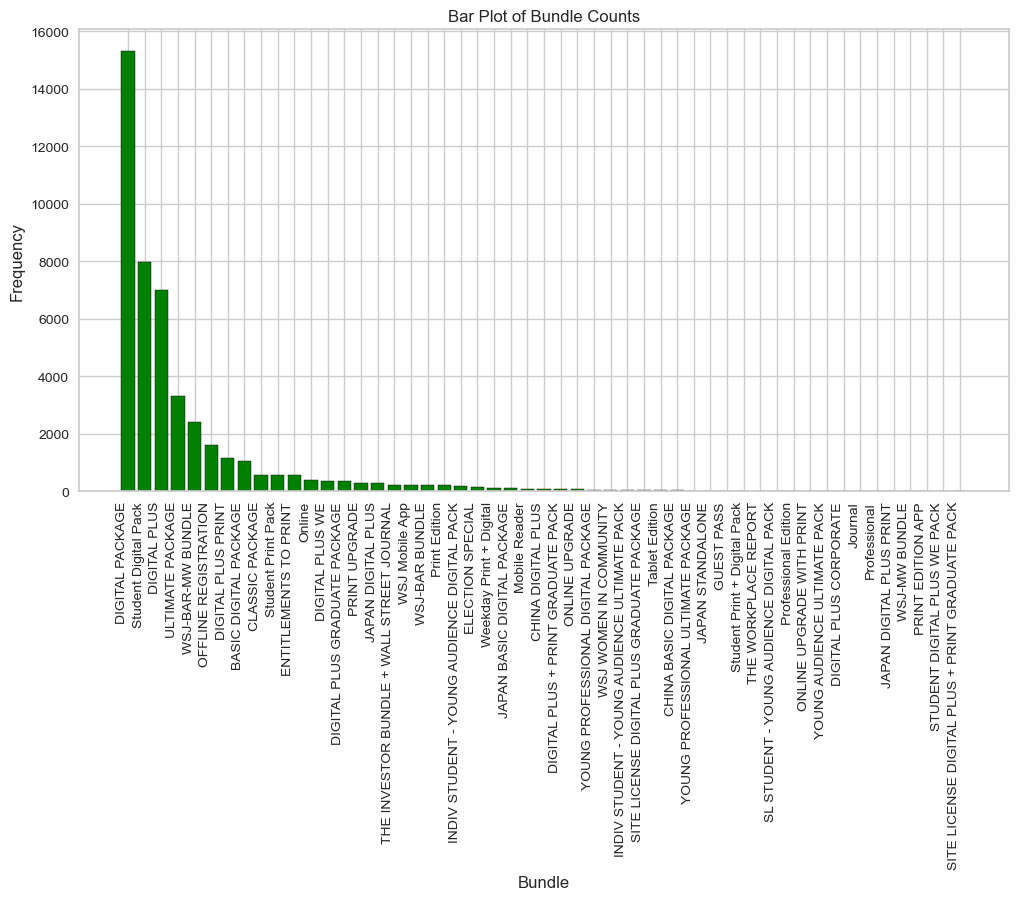

In [13]:
#Checking data distribution of bundles
bundle_counts = df['bundle'].value_counts()

# Plot a bar plot
plt.figure(figsize=(12, 6))
plt.bar(bundle_counts.index, bundle_counts, color='green', edgecolor='black')
plt.xlabel('Bundle')
plt.ylabel('Frequency')
plt.title('Bar Plot of Bundle Counts')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [14]:
#Checking the minimun and maximum dates for Account Creation Dates
Min_Date = df['account_creation_date'].min()
Max_Date = df['account_creation_date'].max()

print(Min_Date,'to', Max_Date)

2007-01-11 to 2023-09-30


In [15]:
#Plotting almost every single date and month from 2007 to 2023 might clutter the visualization. 
#So extracting the year and replacing it in the original column 
df['account_creation_date'] = pd.to_datetime(df['account_creation_date']).dt.year

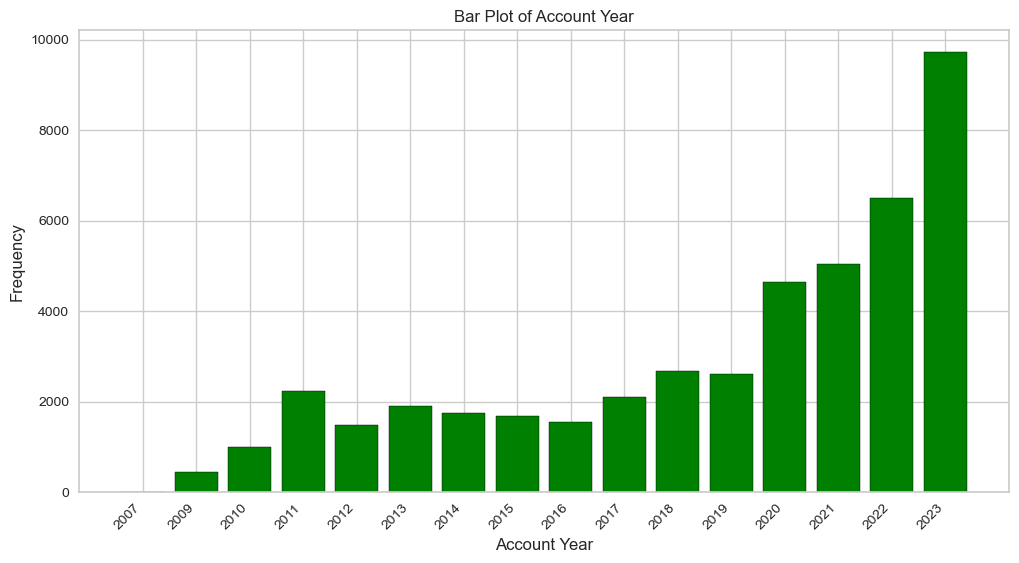

In [16]:
# Checking data distribution of Account Year
AccYear_count = df['account_creation_date'].value_counts().sort_index()

# Plot a bar plot
plt.figure(figsize=(12, 6))
plt.bar(AccYear_count.index.astype(str), AccYear_count, color='green', edgecolor='black')
plt.xlabel('Account Year')
plt.ylabel('Frequency')
plt.title('Bar Plot of Account Year')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


### From the above visualizations, both the categorical variables are also skewed.

In [17]:
#Viewing the data
df.head()

,account_creation_date,bundle,activeDays,activeDaysWeb,activeDaysApps,activeDaysiOs,activeDaysiPhone,activeDaysiPad,activeDaysAndroid,visitsiPhone,...,articlesPerVisitApps,viewsOpinion,viewsPolitics,viewsBusiness,viewsMarkets,viewsWorld,viewsLife,viewsTech,viewsUS,viewsEconomy
0,2022,Student Digital Pack,1,0,1,1,1,0,0,1,...,0.000000,0,0,0,0,0,0,0,0,0
1,2020,Student Digital Pack,2,0,2,2,2,0,0,3,...,1.000000,0,1,0,1,0,0,0,1,0
2,2017,WSJ-BAR-MW BUNDLE,27,27,5,5,5,0,0,6,...,0.000000,1,2,12,19,3,15,8,5,5
3,2023,DIGITAL PACKAGE,19,3,18,18,18,0,0,20,...,0.200000,0,0,0,1,0,1,0,0,3
4,2016,INDIV STUDENT - YOUNG AUDIENCE DIGITAL PACK,23,17,11,11,11,0,0,22,...,0.363636,2,2,14,34,4,4,14,4,0


### Approach

Since the main goal is to categorize our subscribers into N different audience segments, we will use clustering model in unsupervised machine learning. 

### Data 

The entire data we have to work with for the clustering model is heavily skewed, which is not an ideal scenario for any clustering algorithm as we won't be able to produce unique cluster characteristics because of domination of the overly populated features.

### Strategy

After analyzing the data, we can observe how they have been categorized as:

   #### AccountYears -> 2007 to 2023
   #### Bundles -> 51 different bundles
   #### ActiveDays -> Web/App/iOS/Android/iPhone/iPad
   #### Visits -> iPhone/Andorid/Web/App/iPad
   #### ArticleViews -> Web/App
   #### ArticlesPerVisit -> Web/App
   #### Views -> Opinion/Politics/Business/Markets/World/Life/Tech/US/Economy
   
And since every row in the dataset depicts the activity of an individual user, I just want to focus on the user's maximum activity or most interested category among everything else.

This is to convert majority of our skewed numerical data into categorical data to make it more ideal for clustering and also reduces the noise for us to focus on the most important characteric of every user.

In [18]:
# Defining new columns
active_days_columns = ['activeDaysWeb', 'activeDaysApps', 'activeDaysiOs', 'activeDaysiPhone', 'activeDaysiPad', 'activeDaysAndroid']
visits_columns = ['visitsiPhone', 'visitsiPad', 'visitsAndroid', 'visitsWeb', 'visitsApps']
views_columns = ['viewsOpinion', 'viewsPolitics', 'viewsBusiness', 'viewsMarkets', 'viewsWorld', 'viewsLife', 'viewsTech', 'viewsUS', 'viewsEconomy']
article_views_columns = ['articleViewsWeb', 'articleViewsApps']
article_per_visit_columns = ['articlesPerVisitWeb', 'articlesPerVisitApps']

active_days_columns = ['activeDaysiOs', 'activeDaysAndroid', 'activeDaysiPhone', 'activeDaysiPad',
                       'activeDaysWeb', 'activeDaysApps']

visits_columns = ['visitsiPhone', 'visitsAndroid', 'visitsWeb', 'visitsApps','visitsiPad']

views_columns = ['viewsOpinion', 'viewsPolitics', 'viewsBusiness', 'viewsMarkets',
                 'viewsWorld', 'viewsLife', 'viewsTech', 'viewsUS', 'viewsEconomy']

article_views_columns = ['articleViewsWeb', 'articleViewsApps']

article_per_visit_columns = ['articlesPerVisitApps','articlesPerVisitWeb']

# New DataFrame 'New_df'
New_df = pd.DataFrame()

#Filling in data
New_df['AccountYear'] = df['account_creation_date']
New_df['Bundles'] = df['bundle']
New_df['ActiveDays'] = df['activeDays']
New_df['ActiveOn'] = df[active_days_columns].idxmax(axis=1)
New_df['VisitsOn'] = df[visits_columns].idxmax(axis=1)
New_df['ViewsCategory'] = df[views_columns].idxmax(axis=1)
New_df['ArticleViewsFrom'] = df[article_views_columns].idxmax(axis=1)
New_df['ArticlePerVisitFrom'] = df[article_per_visit_columns].idxmax(axis=1)




In [19]:
#Viewing the new dataframe
New_df

,AccountYear,Bundles,ActiveDays,ActiveOn,VisitsOn,ViewsCategory,ArticleViewsFrom,ArticlePerVisitFrom
0,2022,Student Digital Pack,1,activeDaysiOs,visitsiPhone,viewsOpinion,articleViewsWeb,articlesPerVisitApps
1,2020,Student Digital Pack,2,activeDaysiOs,visitsiPhone,viewsPolitics,articleViewsApps,articlesPerVisitApps
2,2017,WSJ-BAR-MW BUNDLE,27,activeDaysWeb,visitsWeb,viewsMarkets,articleViewsWeb,articlesPerVisitWeb
3,2023,DIGITAL PACKAGE,19,activeDaysiOs,visitsiPhone,viewsEconomy,articleViewsApps,articlesPerVisitWeb
4,2016,INDIV STUDENT - YOUNG AUDIENCE DIGITAL PACK,23,activeDaysWeb,visitsWeb,viewsMarkets,articleViewsWeb,articlesPerVisitWeb
...,...,...,...,...,...,...,...,...
45390,2023,DIGITAL PACKAGE,5,activeDaysWeb,visitsWeb,viewsWorld,articleViewsWeb,articlesPerVisitWeb
45391,2015,ULTIMATE PACKAGE,6,activeDaysiOs,visitsiPhone,viewsMarkets,articleViewsApps,articlesPerVisitApps
45392,2023,DIGITAL PACKAGE,4,activeDaysWeb,visitsWeb,viewsTech,articleViewsWeb,articlesPerVisitWeb
45393,2018,ULTIMATE PACKAGE,19,activeDaysWeb,visitsWeb,viewsLife,articleViewsWeb,articlesPerVisitWeb


In [20]:
#Check the data type of the new dataframe
New_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45395 entries, 0 to 45394
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AccountYear          45395 non-null  int64 
 1   Bundles              45395 non-null  object
 2   ActiveDays           45395 non-null  int64 
 3   ActiveOn             45395 non-null  object
 4   VisitsOn             45395 non-null  object
 5   ViewsCategory        45395 non-null  object
 6   ArticleViewsFrom     45395 non-null  object
 7   ArticlePerVisitFrom  45395 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.8+ MB


In [21]:
#Converting the categorical variables into numeric for analysis
df_encoded = pd.get_dummies(New_df, columns=['AccountYear', 'Bundles','ActiveOn','VisitsOn','ViewsCategory','ArticleViewsFrom','ArticlePerVisitFrom'])

### I chose one hot encoding over label encoding as there is no relationship between the values in any particular column


In [22]:
#Checking the size of the encoded dataframe
df_encoded.shape

(45395, 89)

In [23]:
#Statistics of the encoded dataframe
df_encoded.describe()

,ActiveDays,AccountYear_2007,AccountYear_2009,AccountYear_2010,AccountYear_2011,AccountYear_2012,AccountYear_2013,AccountYear_2014,AccountYear_2015,AccountYear_2016,...,ViewsCategory_viewsMarkets,ViewsCategory_viewsOpinion,ViewsCategory_viewsPolitics,ViewsCategory_viewsTech,ViewsCategory_viewsUS,ViewsCategory_viewsWorld,ArticleViewsFrom_articleViewsApps,ArticleViewsFrom_articleViewsWeb,ArticlePerVisitFrom_articlesPerVisitApps,ArticlePerVisitFrom_articlesPerVisitWeb
count,45395.000000,45395.000000,45395.000000,45395.000000,45395.000000,45395.000000,45395.000000,45395.000000,45395.000000,45395.000000,...,45395.000000,45395.000000,45395.000000,45395.000000,45395.000000,45395.000000,45395.000000,45395.000000,45395.000000,45395.000000
mean,10.975967,0.000088,0.010111,0.022095,0.049124,0.032889,0.041965,0.038528,0.037141,0.034211,...,0.175284,0.358255,0.037471,0.045842,0.026545,0.069171,0.364886,0.635114,0.423857,0.576143
std,8.984219,0.009387,0.100046,0.146994,0.216130,0.178348,0.200511,0.192470,0.189108,0.181772,...,0.380214,0.479493,0.189915,0.209145,0.160750,0.253747,0.481403,0.481403,0.494174,0.494174
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### I chose the Yeo-Johnson power transformation method for scaling the features as the data is skewed and Yeo-Johnson power transformation aims to make the data symmetric and can handle both positive and negative values

In [24]:
# Instantiate the PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)

# Apply the transformation to all numeric columns
df_transformed = pd.DataFrame(pt.fit_transform(df_encoded), columns=df_encoded.columns)


In [25]:
#Viewing the transformed data
df_transformed

,ActiveDays,AccountYear_2007,AccountYear_2009,AccountYear_2010,AccountYear_2011,AccountYear_2012,AccountYear_2013,AccountYear_2014,AccountYear_2015,AccountYear_2016,...,ViewsCategory_viewsMarkets,ViewsCategory_viewsOpinion,ViewsCategory_viewsPolitics,ViewsCategory_viewsTech,ViewsCategory_viewsUS,ViewsCategory_viewsWorld,ArticleViewsFrom_articleViewsApps,ArticleViewsFrom_articleViewsWeb,ArticlePerVisitFrom_articlesPerVisitApps,ArticlePerVisitFrom_articlesPerVisitWeb
0,-1.476629,-0.009387,-0.101067,-0.150314,-0.227293,-0.184411,-0.209292,-0.200181,-0.196401,-0.188209,...,-0.461019,1.338397,-0.197306,-0.219191,-0.165132,-0.272600,-0.757971,0.757971,1.165884,-1.165884
1,-1.118930,-0.009387,-0.101067,-0.150314,-0.227293,-0.184411,-0.209292,-0.200181,-0.196401,-0.188209,...,-0.461019,-0.747163,5.068258,-0.219191,-0.165132,-0.272600,1.319311,-1.319311,1.165884,-1.165884
2,1.416104,-0.009387,-0.101067,-0.150314,-0.227293,-0.184411,-0.209292,-0.200181,-0.196401,-0.188209,...,2.169110,-0.747163,-0.197306,-0.219191,-0.165132,-0.272600,-0.757971,0.757971,-0.857718,0.857718
3,0.963847,-0.009387,-0.101067,-0.150314,-0.227293,-0.184411,-0.209292,-0.200181,-0.196401,-0.188209,...,-0.461019,-0.747163,-0.197306,-0.219191,-0.165132,-0.272600,1.319311,-1.319311,-0.857718,0.857718
4,1.205398,-0.009387,-0.101067,-0.150314,-0.227293,-0.184411,-0.209292,-0.200181,-0.196401,5.313240,...,2.169110,-0.747163,-0.197306,-0.219191,-0.165132,-0.272600,-0.757971,0.757971,-0.857718,0.857718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45390,-0.441469,-0.009387,-0.101067,-0.150314,-0.227293,-0.184411,-0.209292,-0.200181,-0.196401,-0.188209,...,-0.461019,-0.747163,-0.197306,-0.219191,-0.165132,3.668379,-0.757971,0.757971,-0.857718,0.857718
45391,-0.278583,-0.009387,-0.101067,-0.150314,-0.227293,-0.184411,-0.209292,-0.200181,5.091628,-0.188209,...,2.169110,-0.747163,-0.197306,-0.219191,-0.165132,-0.272600,1.319311,-1.319311,1.165884,-1.165884
45392,-0.628199,-0.009387,-0.101067,-0.150314,-0.227293,-0.184411,-0.209292,-0.200181,-0.196401,-0.188209,...,-0.461019,-0.747163,-0.197306,4.562240,-0.165132,-0.272600,-0.757971,0.757971,-0.857718,0.857718
45393,0.963847,-0.009387,-0.101067,-0.150314,-0.227293,-0.184411,-0.209292,-0.200181,-0.196401,-0.188209,...,-0.461019,-0.747163,-0.197306,-0.219191,-0.165132,-0.272600,-0.757971,0.757971,-0.857718,0.857718


#### I chose the t-SNE (t-distributed Stochastic Neighbor Embedding) method for dimensionality reduction as it is a non-linear technique which is perfect for our data

In [26]:
# Initiating t-SNE to reduce dimensions to 3
tsne = TSNE(n_components=3)
tsne_result = tsne.fit_transform(df_transformed)

# Creating a DataFrame for the t-SNE results
tsne_ds = pd.DataFrame(tsne_result, columns=["col1", "col2", "col3"])
tsne_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,45395.0,0.223565,19.171816,-47.113880,-13.559491,0.370617,13.861830,47.972126
col2,45395.0,-0.122611,19.421198,-48.665569,-14.221752,-0.194541,13.910069,47.853897
col3,45395.0,0.013512,19.502235,-48.627743,-13.935292,0.004505,14.387960,47.885670


Silhouette Score Method to determine the number of clusters to be formed:


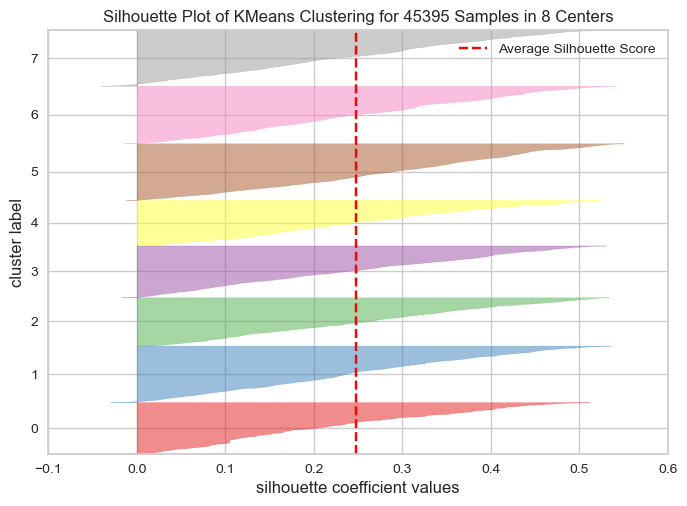

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 45395 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [29]:
# Quick examination of silhouette score to find the number of clusters to be formed.
print('Silhouette Score Method to determine the number of clusters to be formed:')
Silhouette_V = SilhouetteVisualizer(KMeans(), k=(2, 10))
Silhouette_V.fit(tsne_ds)
Silhouette_V.show()

In [30]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=8)
# fit model and predict clusters
yhat_AC = AC.fit_predict(tsne_ds)
tsne_ds["Clusters"] = yhat_AC

In [31]:
#Adding the Clusters feature to the orignal dataframe.
New_df["Clusters"]= yhat_AC

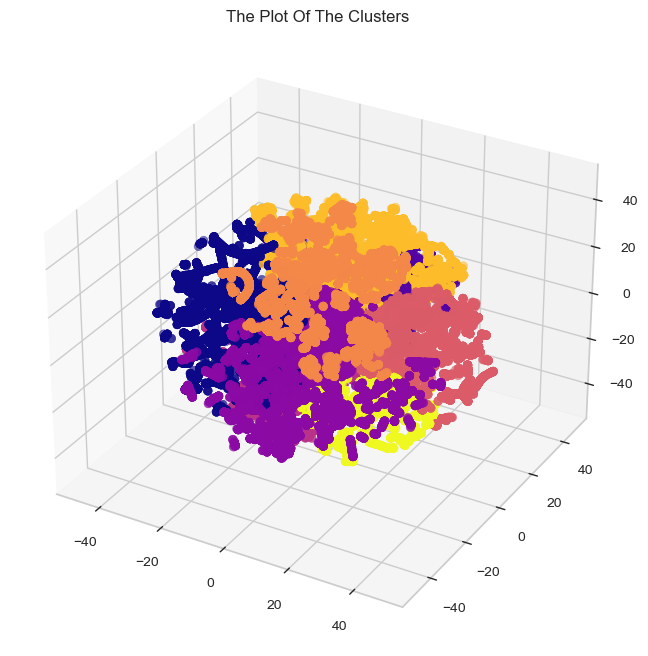

In [32]:
#A 3D Projection Of Data In The Reduced Dimension
x =tsne_ds["col1"]
y =tsne_ds["col2"]
z =tsne_ds["col3"]
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=New_df["Clusters"], marker='o', cmap = 'plasma' )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [33]:
#Viewing the dataframe with Clusters
New_df

,AccountYear,Bundles,ActiveDays,ActiveOn,VisitsOn,ViewsCategory,ArticleViewsFrom,ArticlePerVisitFrom,Clusters
0,2022,Student Digital Pack,1,activeDaysiOs,visitsiPhone,viewsOpinion,articleViewsWeb,articlesPerVisitApps,7
1,2020,Student Digital Pack,2,activeDaysiOs,visitsiPhone,viewsPolitics,articleViewsApps,articlesPerVisitApps,2
2,2017,WSJ-BAR-MW BUNDLE,27,activeDaysWeb,visitsWeb,viewsMarkets,articleViewsWeb,articlesPerVisitWeb,0
3,2023,DIGITAL PACKAGE,19,activeDaysiOs,visitsiPhone,viewsEconomy,articleViewsApps,articlesPerVisitWeb,1
4,2016,INDIV STUDENT - YOUNG AUDIENCE DIGITAL PACK,23,activeDaysWeb,visitsWeb,viewsMarkets,articleViewsWeb,articlesPerVisitWeb,4
...,...,...,...,...,...,...,...,...,...
45390,2023,DIGITAL PACKAGE,5,activeDaysWeb,visitsWeb,viewsWorld,articleViewsWeb,articlesPerVisitWeb,0
45391,2015,ULTIMATE PACKAGE,6,activeDaysiOs,visitsiPhone,viewsMarkets,articleViewsApps,articlesPerVisitApps,5
45392,2023,DIGITAL PACKAGE,4,activeDaysWeb,visitsWeb,viewsTech,articleViewsWeb,articlesPerVisitWeb,0
45393,2018,ULTIMATE PACKAGE,19,activeDaysWeb,visitsWeb,viewsLife,articleViewsWeb,articlesPerVisitWeb,2


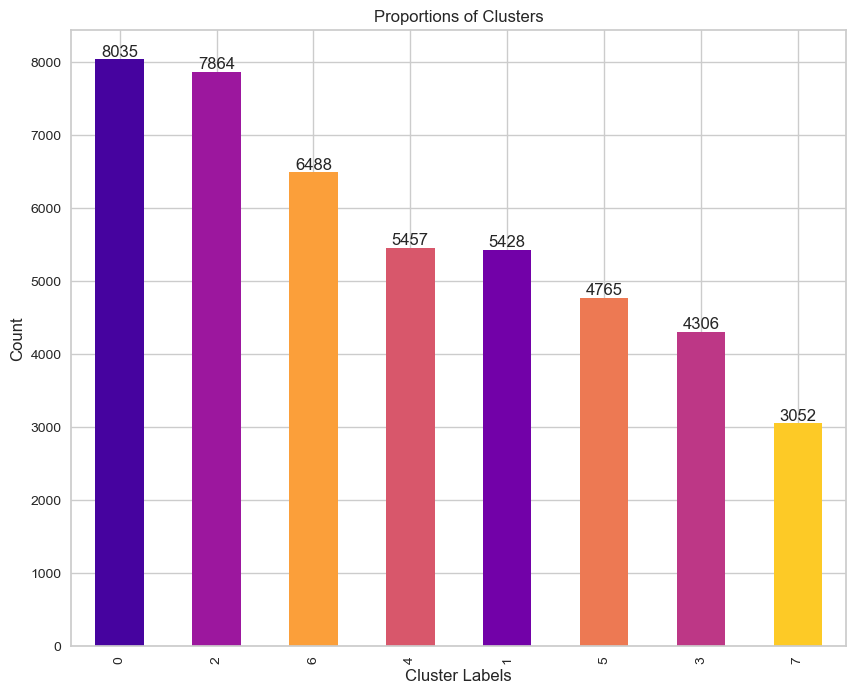

In [34]:
#To see the proportions of the clusters
cluster_labels = New_df["Clusters"]

# Count the occurrences of each cluster
cluster_counts = cluster_labels.value_counts()

# Define a color palette 
colors = sns.color_palette('plasma', n_colors=max(cluster_labels) + 1)

# Plotting the proportions of clusters in a bar plot with consistent colors
fig, ax = plt.subplots(figsize=(10, 8))
cluster_counts.plot(kind='bar', color=[colors[i] for i in cluster_counts.index], ax=ax)

# Adding labels and title
ax.set_xlabel('Cluster Labels')
ax.set_ylabel('Count')
ax.set_title('Proportions of Clusters')

# Adding annotations with the actual counts
for i, count in enumerate(cluster_counts):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()

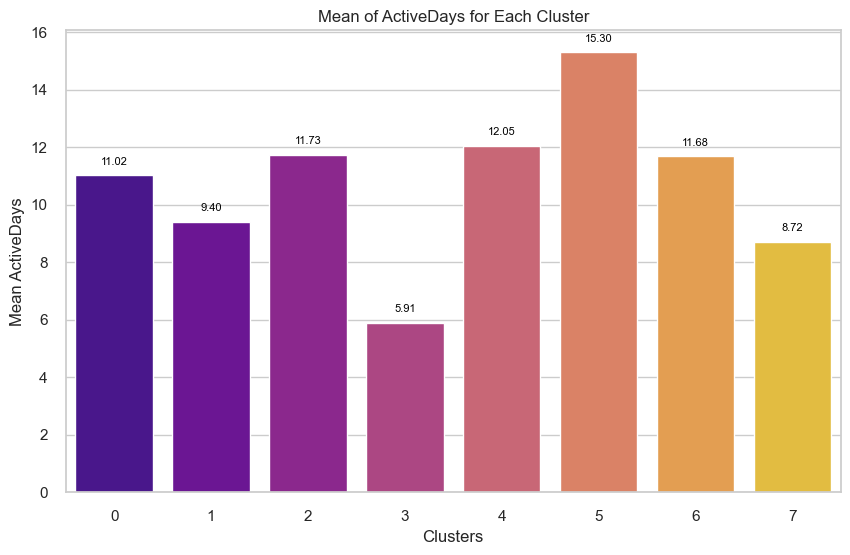

In [35]:
# Calculate the mean of activeDays for each cluster
mean_active_days = New_df.groupby('Clusters')['ActiveDays'].mean().reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot of the mean activeDays colored by clusters using the 'plasma' palette
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=mean_active_days, x='Clusters', y='ActiveDays', palette='plasma')

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.title('Mean of ActiveDays for Each Cluster')
plt.xlabel('Clusters')
plt.ylabel('Mean ActiveDays')

# Show the plot
plt.show()


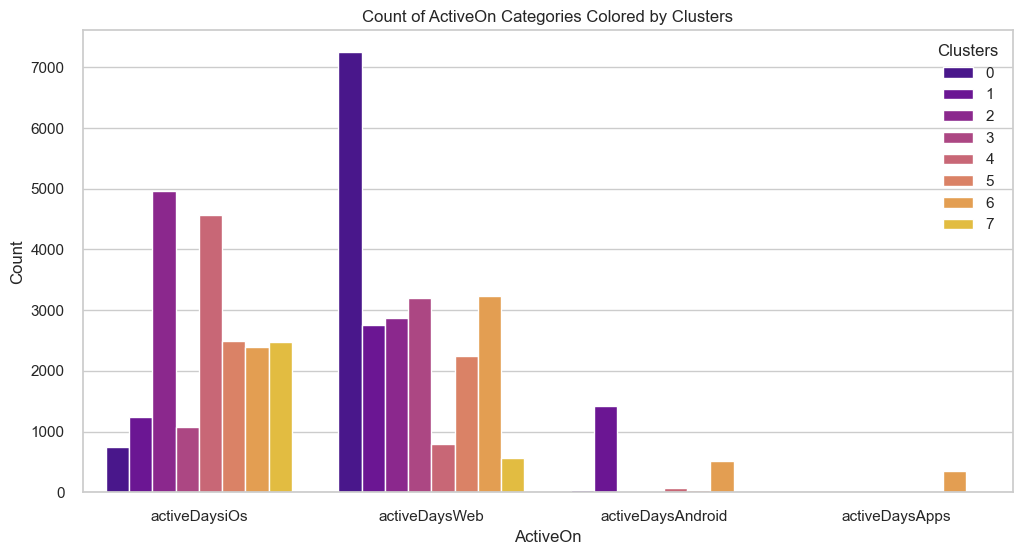

In [36]:
#See the Clusters Distribution for ActiveOn
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot for each cluster without stacking
plt.figure(figsize=(12, 6))
sns.countplot(data=New_df, x='ActiveOn', hue='Clusters', palette='plasma')
plt.title('Count of ActiveOn Categories Colored by Clusters')
plt.xlabel('ActiveOn')
plt.ylabel('Count')

# Show the plot
plt.show()


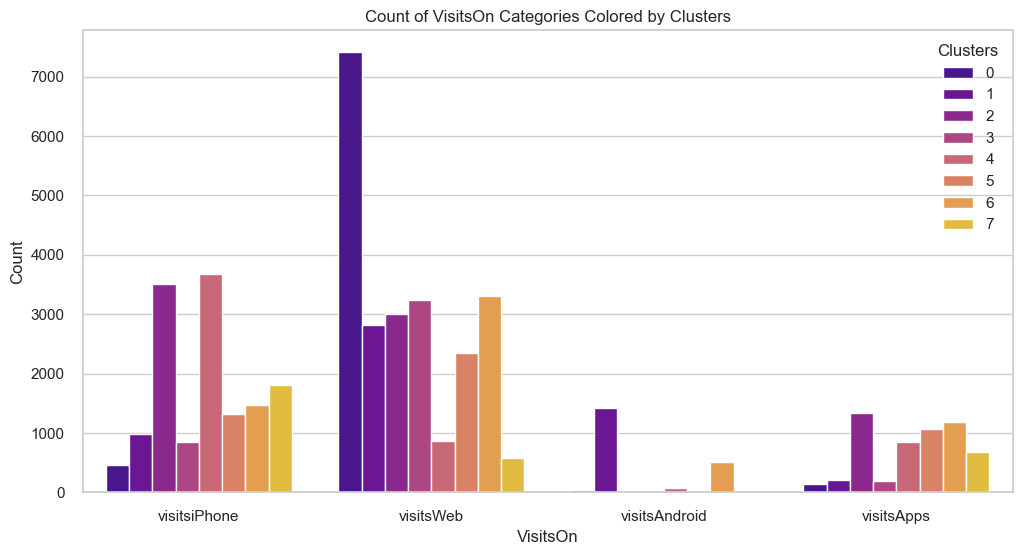

In [37]:
#See the Clusters Distribution for VisitsOn

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot for each cluster without stacking
plt.figure(figsize=(12, 6))
sns.countplot(data=New_df, x='VisitsOn', hue='Clusters', palette='plasma')
plt.title('Count of VisitsOn Categories Colored by Clusters')
plt.xlabel('VisitsOn')
plt.ylabel('Count')

# Show the plot
plt.show()

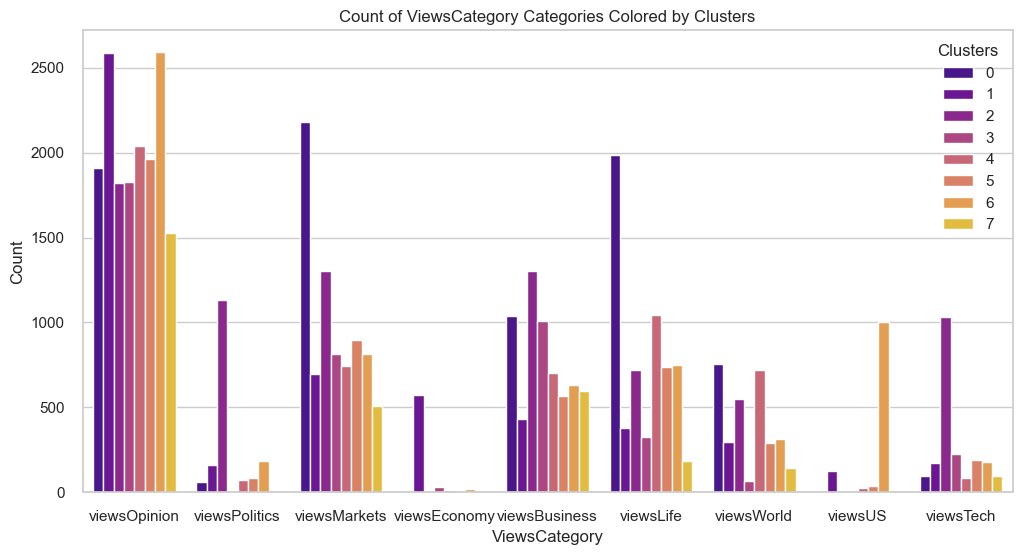

In [38]:
#See the Clusters Distribution for ViewsCategory

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot for each cluster without stacking
plt.figure(figsize=(12, 6))
sns.countplot(data=New_df, x='ViewsCategory', hue='Clusters', palette='plasma')
plt.title('Count of ViewsCategory Categories Colored by Clusters')
plt.xlabel('ViewsCategory')
plt.ylabel('Count')

# Show the plot
plt.show()

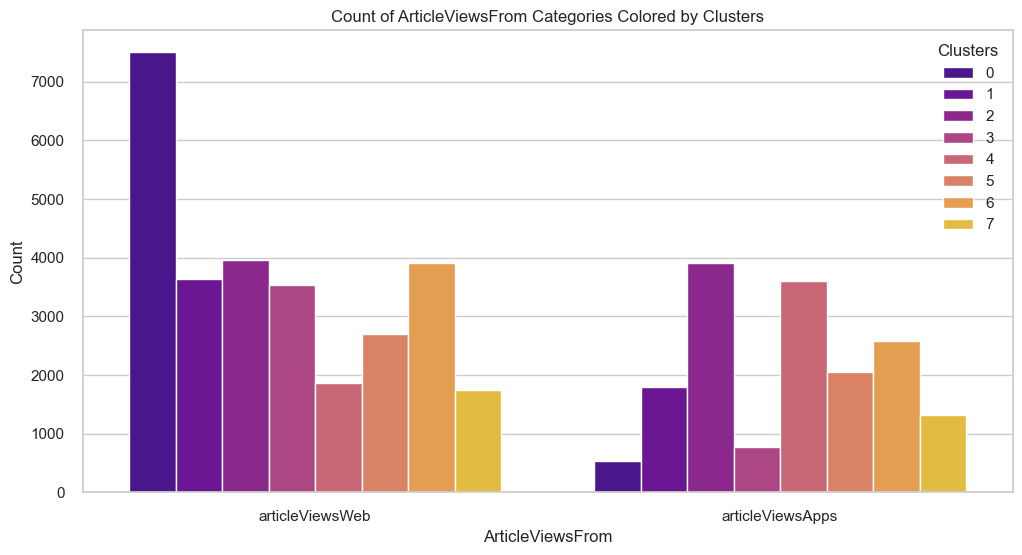

In [39]:
#See the Clusters Distribution for ArticleViewsFrom

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot for each cluster without stacking
plt.figure(figsize=(12, 6))
sns.countplot(data=New_df, x='ArticleViewsFrom', hue='Clusters', palette='plasma')
plt.title('Count of ArticleViewsFrom Categories Colored by Clusters')
plt.xlabel('ArticleViewsFrom')
plt.ylabel('Count')

# Show the plot
plt.show()

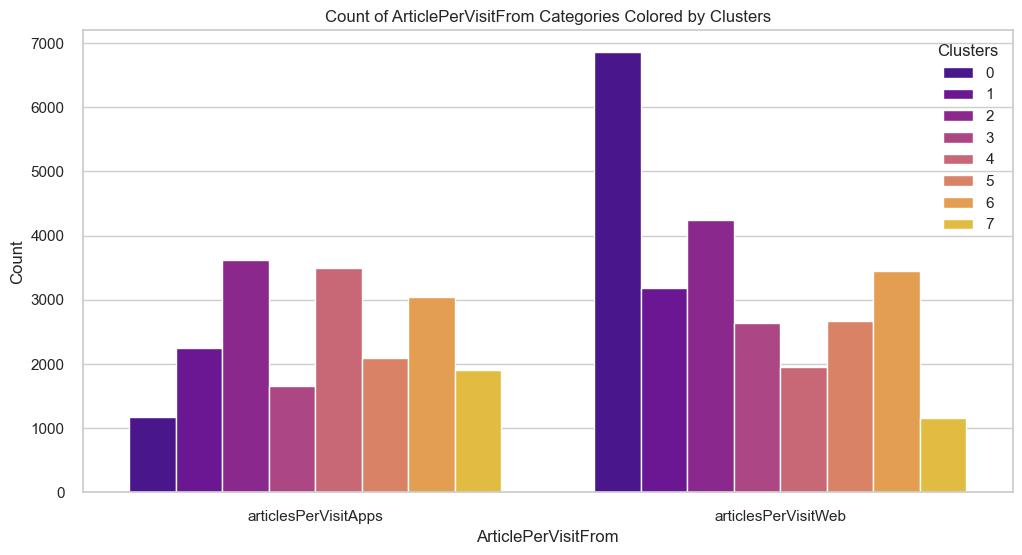

In [40]:
#See the Clusters Distribution for ArticlePerVisitFrom

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot for each cluster without stacking
plt.figure(figsize=(12, 6))
sns.countplot(data=New_df, x='ArticlePerVisitFrom', hue='Clusters', palette='plasma')
plt.title('Count of ArticlePerVisitFrom Categories Colored by Clusters')
plt.xlabel('ArticlePerVisitFrom')
plt.ylabel('Count')

# Show the plot
plt.show()

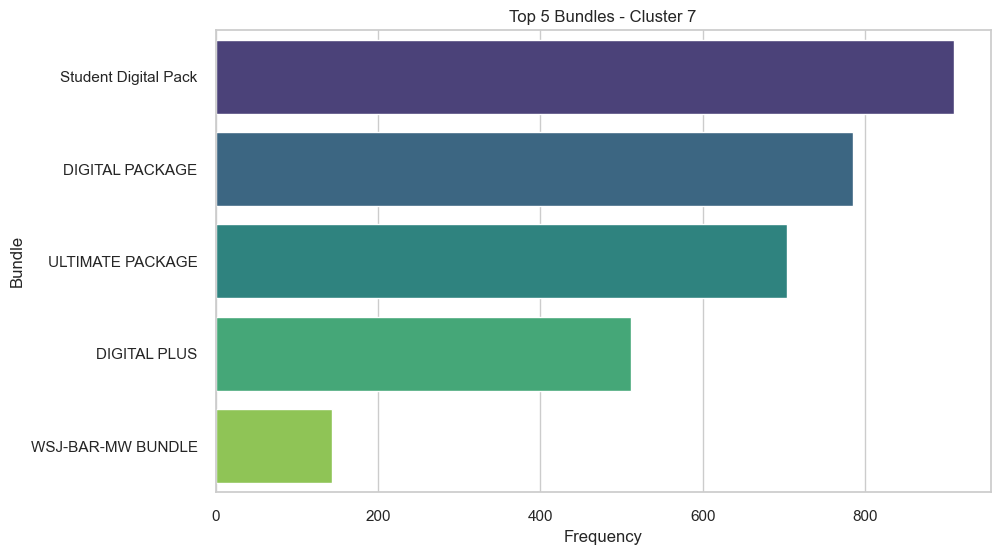

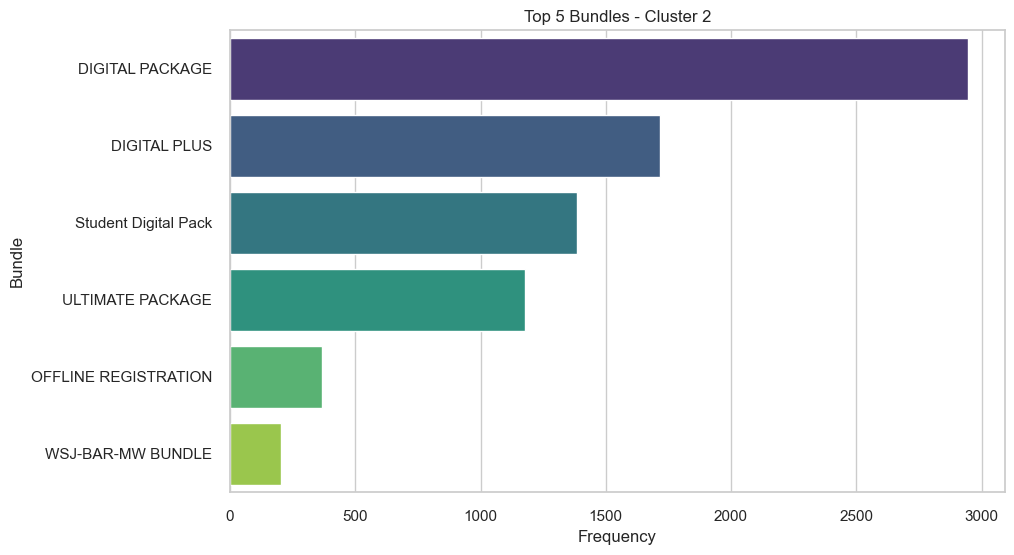

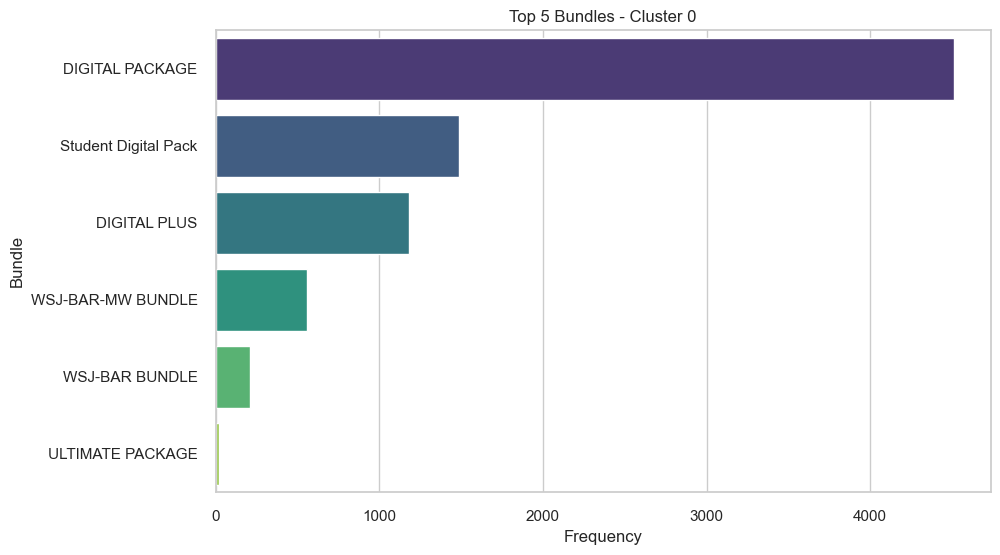

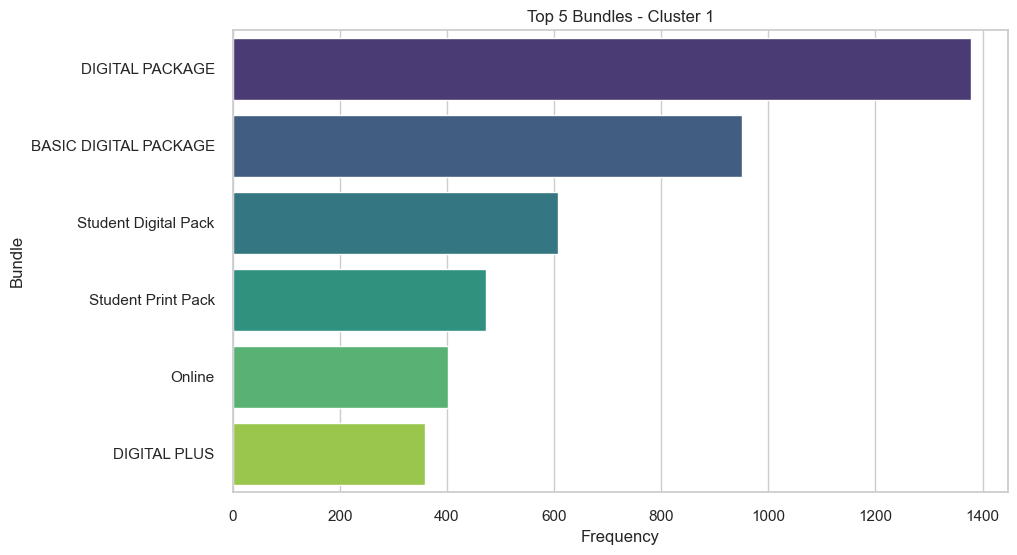

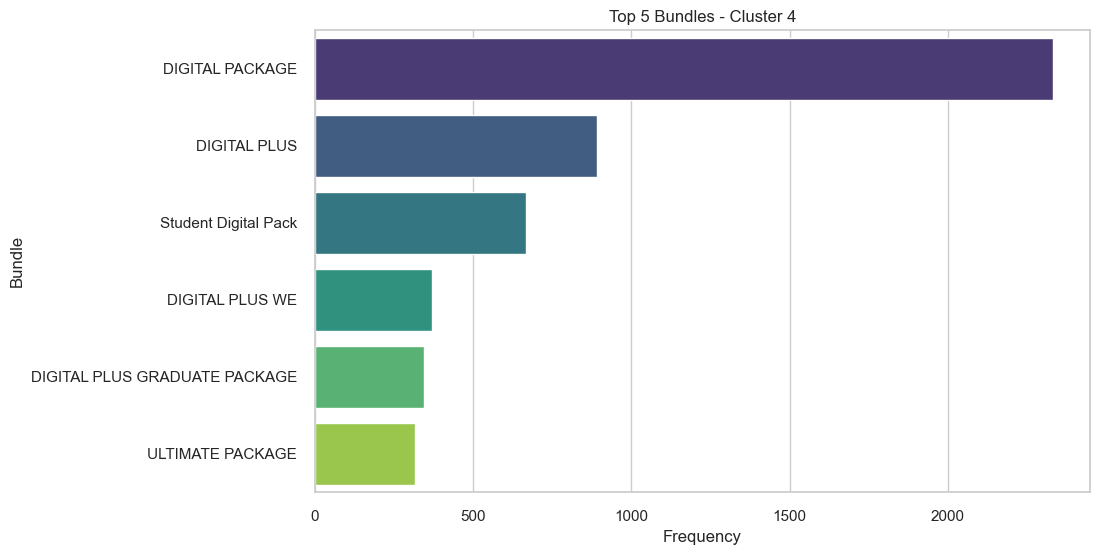

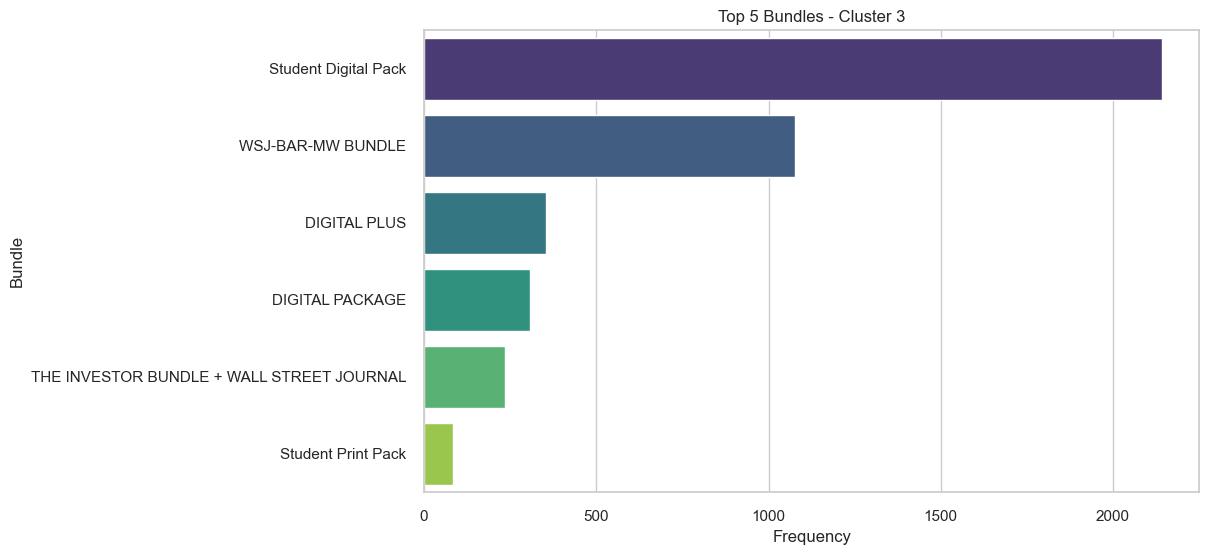

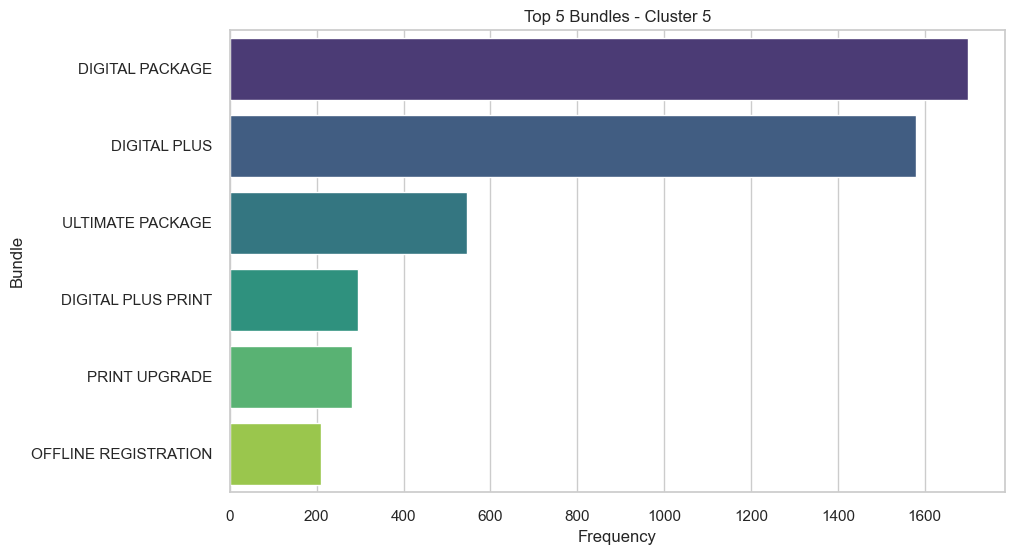

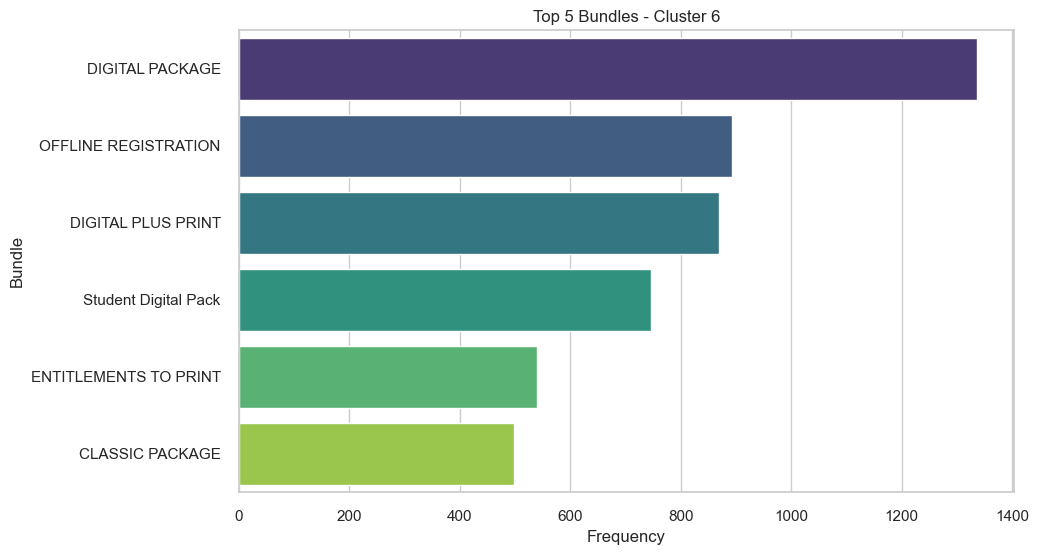

In [41]:
#See the Clusters Distribution for Bundles

# To store top bundles for each cluster
top_bundles_by_cluster = {}

# Iterate over unique cluster labels
for cluster_label in New_df['Clusters'].unique():
    # Select rows belonging to the current cluster
    cluster_df = New_df[New_df['Clusters'] == cluster_label]
    
    # Get the top 5 bundles in the current cluster
    top_bundles = cluster_df['Bundles'].value_counts().nlargest(6)
    
    # Add the top bundles to the dictionary with the cluster label as the key
    top_bundles_by_cluster[cluster_label] = top_bundles

# Plot bar charts for each cluster
for cluster_label, top_bundles in top_bundles_by_cluster.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_bundles.values, y=top_bundles.index, palette='viridis')
    plt.title(f'Top 5 Bundles - Cluster {cluster_label}')
    plt.xlabel('Frequency')
    plt.ylabel('Bundle')
    plt.show()


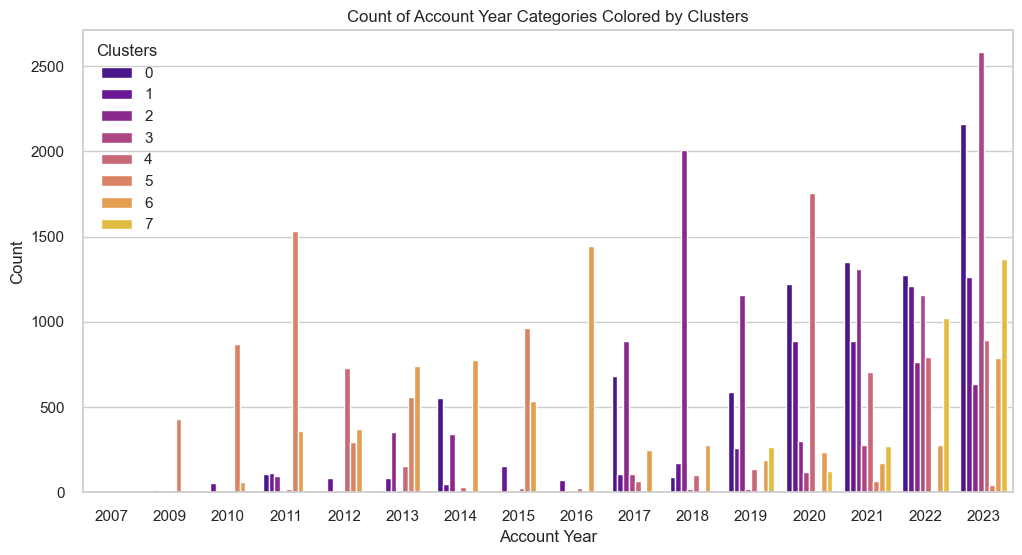

In [42]:
#See the Clusters Distribution for AccountYear

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot for each cluster without stacking
plt.figure(figsize=(12, 6))
sns.countplot(data=New_df, x='AccountYear', hue='Clusters', palette='plasma')
plt.title('Count of Account Year Categories Colored by Clusters')
plt.xlabel('Account Year')
plt.ylabel('Count')

# Show the plot
plt.show()

### Findings:

#### Cluster 0: 
Has majority of the users who subscribed to WSJ in 2023. The top bundle for this Cluster is Digital Package followed by Student Digital Package. The mean active days for this cluster is 11 and they are mostly active via Web so they have more visits from Web hence their article views and article per visit ratio, both are high from Web compared to Apps. The top 2 articles this cluster views are articles on Markets and Life.

#### Cluster 1: 
Has majority of the users who subscribed to WSJ in 2023. The top bundle for this Cluster is Digital Package followed by Basic Digital Package. The mean active days for this cluster is 9 and they are mostly active via Web so they have more visits from Web hence their article views and article per visit ratio, both are high from Web compared to Apps. The top 2 articles this cluster views are articles on Opinion and Market.

#### Cluster 2: 
Has majority of the users who subscribed to WSJ in 2018. The top bundle for this Cluster is Digital Package followed by Digital Plus. The mean active days for this cluster is 12 and they are mostly active via iOS so they have more visits from iPhone hence their article views and article per visit ratio, both are high from Apps compared to Web. The top 2 articles this cluster views are articles on Opinion and Market.

#### Cluster 3: 
Has majority of the users who subscribed to WSJ in 2023. The top bundle for this Cluster is Digital Package followed by WSJ-BAR-MKW Bundle. The mean active days for this cluster is 6 and they are mostly active via Web so they have more visits from iPhone hence their article views and article per visit ratio, both are high from Web compared to Apps. The top 2 articles this cluster views are articles on Opinion and Business.

#### Cluster 4: 
Has majority of the users who subscribed to WSJ in 2023. The top bundle for this Cluster is Digital Package followed by  Digital Plus. The mean active days for this cluster is 12 and they are mostly active via iOS so they have more visits from iPhone hence their article views and article per visit ratio, both are high from Apps compared to Web. The top 2 articles this cluster views are articles on Opinion and Business.

#### Cluster 5: 
Has majority of the users who subscribed to WSJ in 2011. The top bundle for this Cluster is Digital Package followed by  Digital Plus. The mean active days for this cluster is 15 and they are mostly active via iOS so they have more visits from iPhone hence their article views and article per visit ratio, both are high from Apps compared to Web. The top 2 articles this cluster views are articles on Opinion and Markets.

#### Cluster 6: 
Has majority of the users who subscribed to WSJ in 2016. The top bundle for this Cluster is Digital Package followed by Offline Registration. The mean active days for this cluster is 12 and they are mostly active via Web so they have more visits from Web hence their article views and article per visit ratio, both are high from Web compared to Apps. The top 2 articles this cluster views are articles on Opinion and US.

#### Cluster 7: 
Has majority of the users who subscribed to WSJ in 2023. The top bundle for this Cluster is Student Digital Package followed by Digital Package. The mean active days for this cluster is 9 and they are mostly active via iOS and they have more visits from iPhone compared to iPad, hence their article views and article per visit ratio, both are high from Apps compared to Web. The top 2 articles this cluster views are on Opinion and Business.


### Based on these different User segments as mentioned above, the WSJ newsroom should target to publish articles catering to each cluster for an increased user engagement